# **Projeto: Preço de Smartphone**

# **Conteúdo**

O ciclo de vida deste projeto é o seguinte

 1.  `Motivação`
 2.  `Informação sobre os dados`
     *   Informações  básicas
     *   Carregando as bibliotecas
     *   Importando os dados
     *   Explorando os dados
     *   Valores faltantes
     *   Renomeando as colunas
 3.  `Análise exploratória de dados`
     *   Gráfico de distribução 
     *   Pairplot
     *   Mapa de calor: Correlação 
 4.   `Feature Engineering`
     *   Decomposição: input e output
     *   Estandardização
 5.  `Modelo de Machine learning`
     *   Regressão linear
 6.  `Resultados e conclusões`
 7.  `Referências`

# 1. Motivação 

*Que atire a primeira pedra aquele que nunca passou por uma situação complicada na hora de comprar um smartphone, sempre queremos ter certeza que estamos tomando a decisão mais correta, já que estamos procurando um produto que bata com nossas necesidades e, ao mesmo tempo, se for o caso, um produto de baixo custo. Por esse motivo decidi construir um modelo de machine learning, regressão linear, para estimar os preço dos smartphone, para isso utilizei um conjunto de dados de smartphone extraído do site kaggle[1], contendo atributos essenciais como memória, câmera, entre outras. O objetivo desse modelo é proporcionar uma decisão mais informada na escolha do dispositivo ideal que atenda às nossas necessidades.*

$\qquad\qquad\qquad\qquad\qquad\qquad\qquad$ 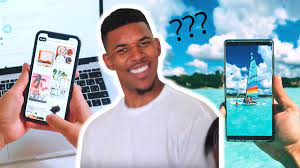

# 2. Informações sobre os dados

## 2.1 Informações básicas

*O preço de smartphone de varios fatores, tais como, resolução, marca, tamanho, peso, qualidade , mémoria RAM, etc.*

* **Product_id** : ID de cada smartphone.
* **Price** : Preço de cada smartphone.
* **Sale** : Número de oferta.
* **weight** : Peso de cada smartphone.
* **resoloution** :  Resolução de cada smartphone.
* **ppi** : Densidade de pixels do telefone.
* **cpu core** : Tipo de núcleo da CPU em cada celular.
* **cpu freq** : Frequência da CPU em cada celular.
* **internal mem** : Memoria interna do smartphone.
* **ram** : Memoria RAM.



## 2.2 Importando bibliotecas

In [1]:
# treatment of data
# ==============================================================================
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Graphics
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

## 2.3 Carregando os dados

In [2]:
# Carregando os dados
# ==============================================================================
data =pd.read_csv("/kaggle/input/mobile-price-prediction/Cellphone.csv")

## 2.4 Explorando os dados

*Explorar os dados nos ajuda a entender melhor o conjunto de dados, identificar padrões, tendências e anomalias, e nos permite tomar decisões informadas sobre como manipular e analisar os dados.*

*Além disso, ao explorar os dados, podemos descobrir insights interessantes e levantar questões adicionais para investigação.*

*Em resumo, essa etapa nos ajuda a fazer escolhas informadas sobre como lidar com os dados no restante do projeto, incluindo escolher modelos de análise e técnicas apropriadas.*


In [3]:
# Visualizando as 5 primeiras filas
#===============================================================================
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [4]:
# Dimensionalidade dos dados
# ==============================================================================
data.shape

(161, 14)

In [5]:
# Info sobre os dados
# ==============================================================================
data.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [6]:
# Info sobre os dados
# ==============================================================================
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


## 2.5 Valores faltantes

In [7]:
# Visualizando os valores nulos 
# ==============================================================================
data.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

## 2.6 Renomeando as colunas

In [8]:
# Renomeando as colunas
# ==============================================================================
colname = ["ID Producto", "Preço", "Oferta", "Peso" , "Resolução", "PPI", "Cpu_Core","Cpu_Freq",
           "Mem Interna", "RAM", "RearCam", "FrontCam", "Bateria", "Grossura"]
data.columns = colname
data

,ID Producto,Preço,Oferta,Peso,Resolução,PPI,Cpu_Core,Cpu_Freq,Mem Interna,RAM,RearCam,FrontCam,Bateria,Grossura
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


**Conclusões da exploração de dados**

*   *O conjunto de dados apresenta $161$ observações e $14$ variáveis.*
*   *Todas nossas colunas são do tipo numérico.*
*   *O conjunto de dados não apresentam valores faltantes.*
*   *O preço mínimo, média, e máximo de smarthphone é $614$, $2258$, e $4361$, respectivamente.*

# 3. Análise Exploratória de dados

## 3.1 Distribução dos dados

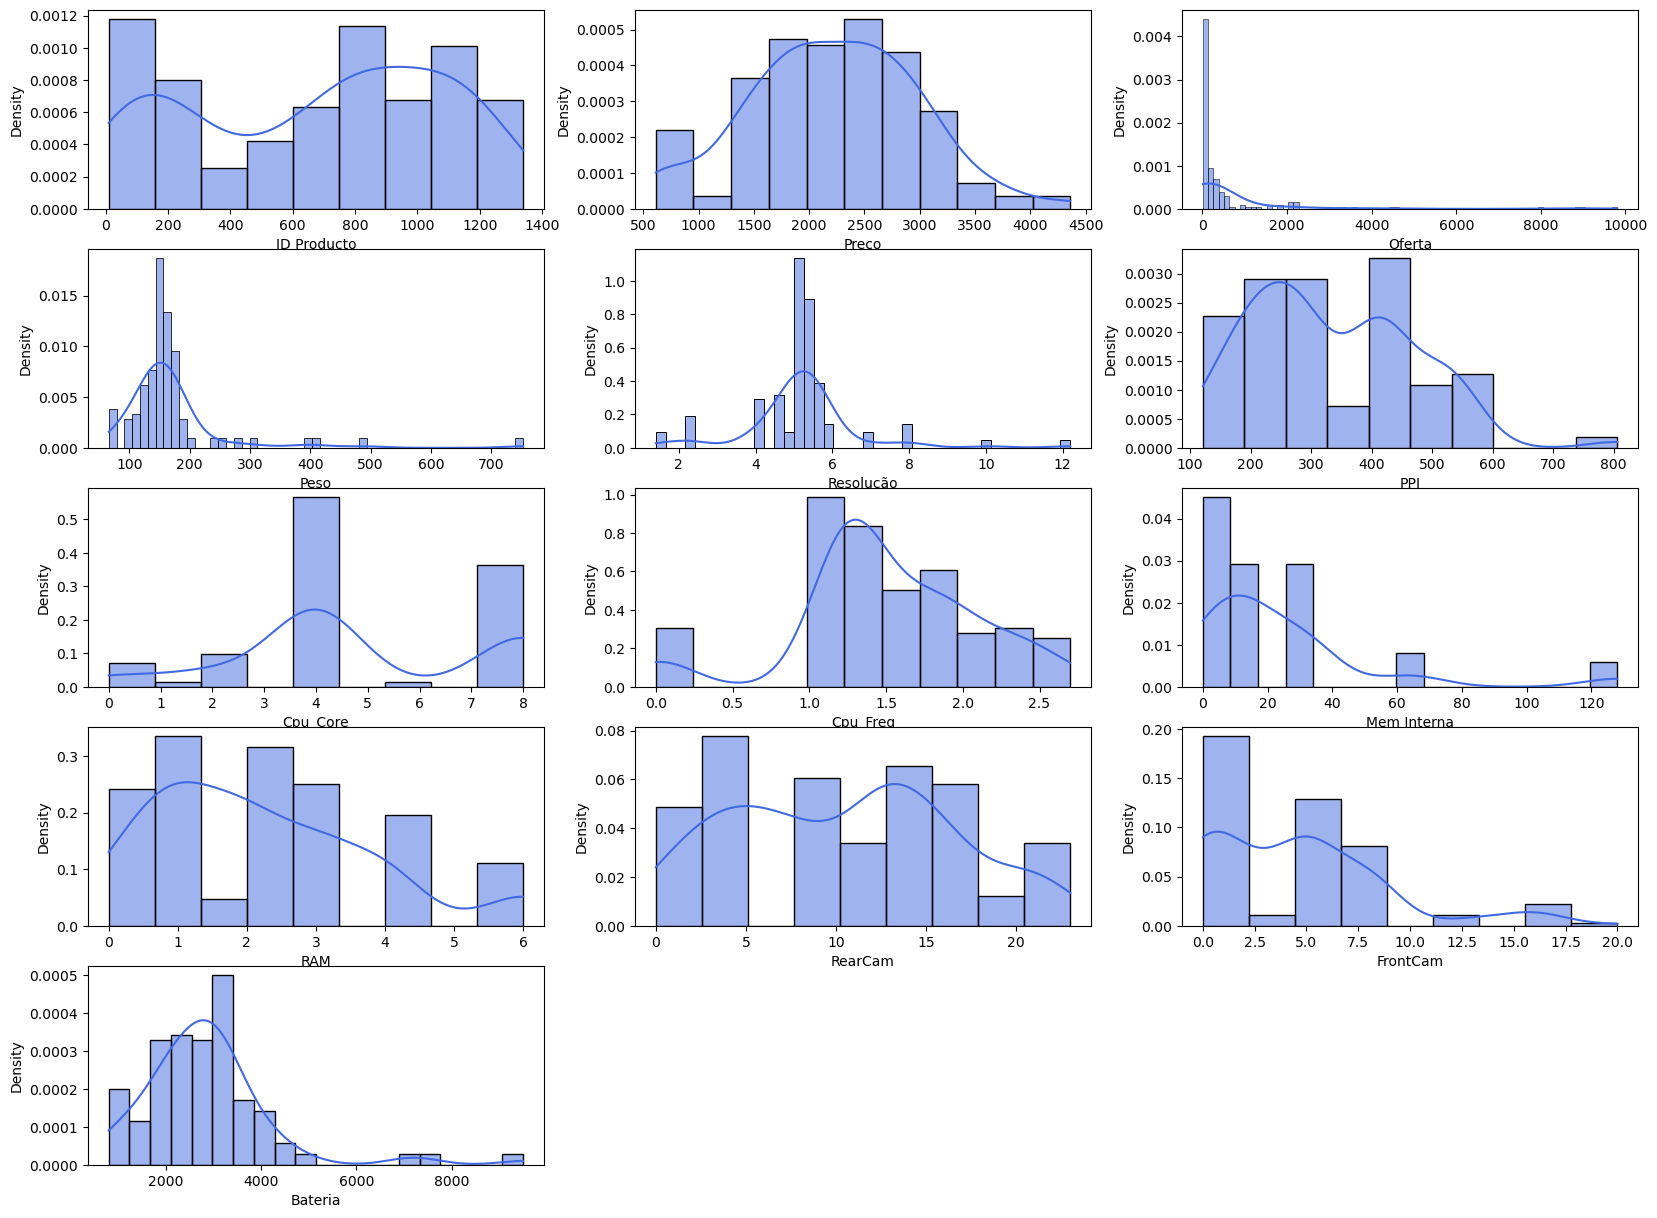

In [9]:
# Gráfica de distribução
# ==============================================================================
plt.figure(figsize=(20,15))
j = 1
for i in data.iloc[:,:-1].columns:
    plt.subplot(5,3,j)
    sns.histplot(data[i], stat = "density", kde = True , color = "royalblue")
    j+=1
plt.show()

## 3.2 PairPlot

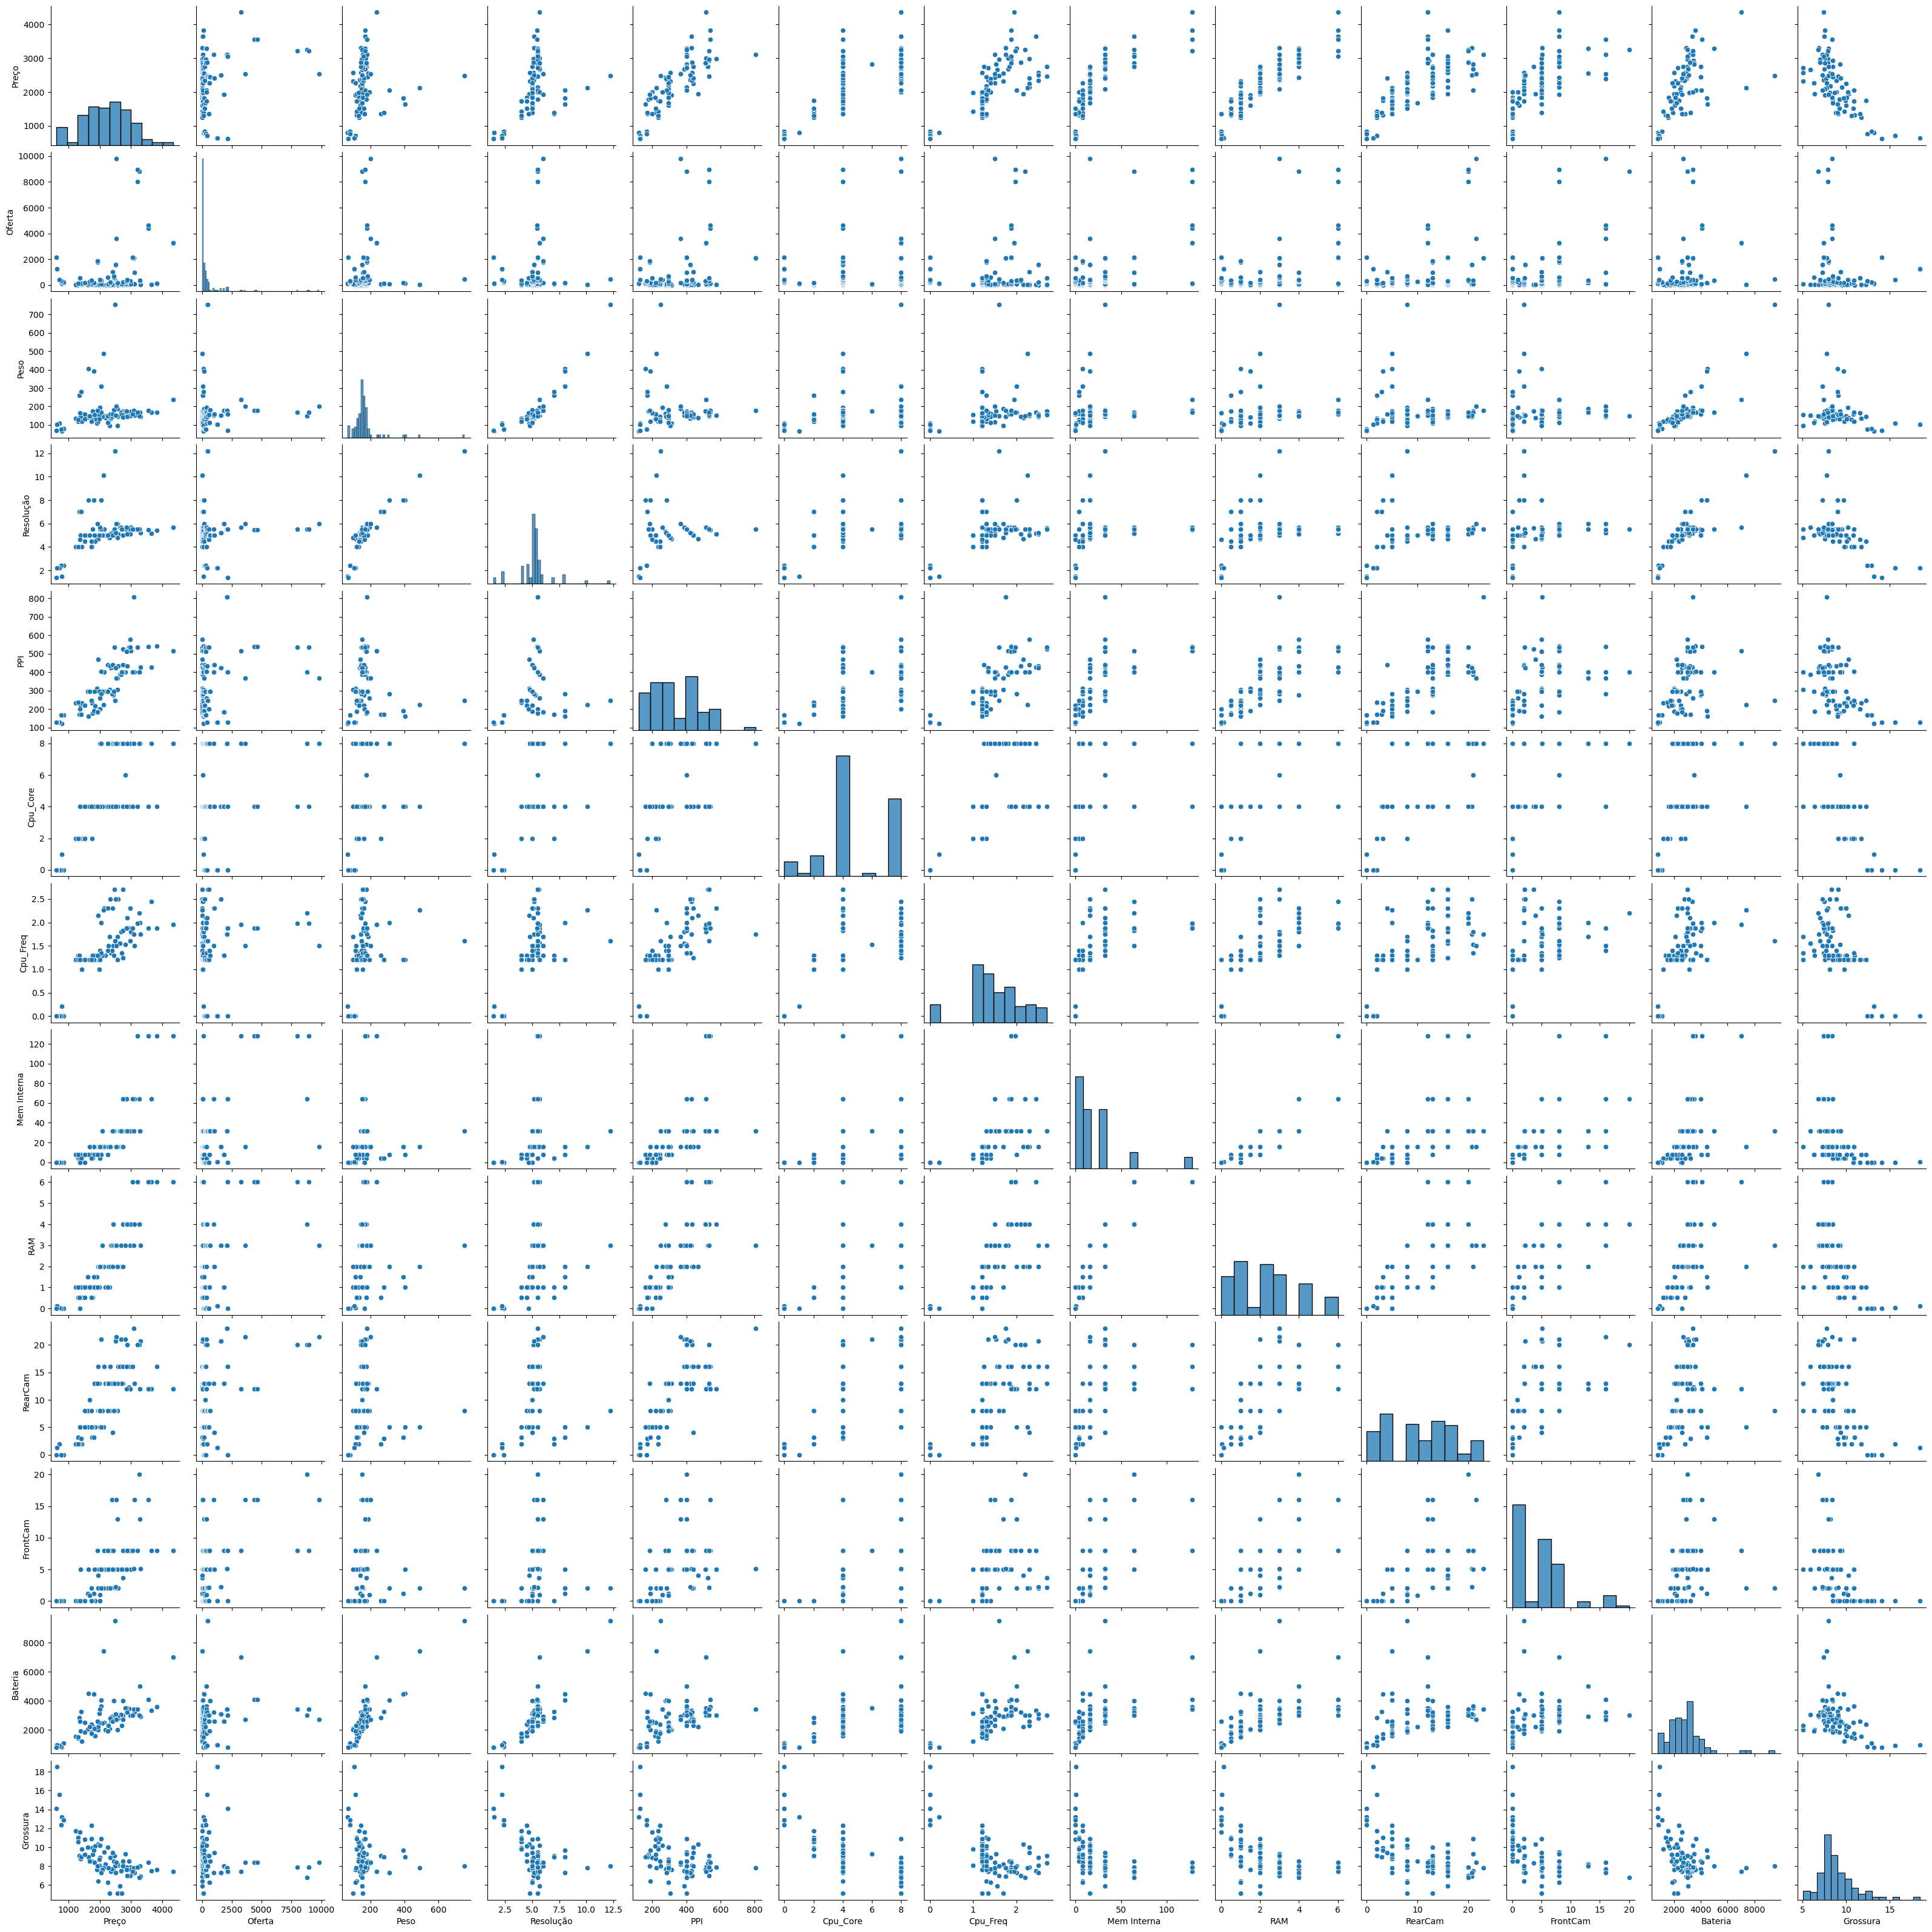

In [10]:
# Scatter visualization
# ==============================================================================
sns.pairplot(data= data.drop(["ID Producto"], axis =1))
plt.show()

## 3.3 Mapa de calor : Correlação

*Correlação é uma medida estatística que expressa até que ponto duas variáveis estão linearmente relacionadas (o que significa que mudam juntas a uma taxa constante). Aqui podemos ver os tipos de correlação*

*    $\textit{Correlação positiva perfeita = $+1$}$
*    $\textit{Alta correlação positiva ~ $+0.9$}$
*    $\textit{Baixa correlação negativa ~ $+0.5$}$ 
*    $\textit{Não correlação = $0$}$
*    $\textit{Baixa correlação negativa ~ $-0.5$}$
*    $\textit{Alta correlação negativa ~ $-0.9$}$
*    $\textit{Correlação negativa perfeita = $-1$}$

$\underline{Observação :}$

*Aqui é importante comentar que no modelo de regressão linear, é comum selecionar as variáveis independentes que possuem uma alta correlação (positiva ou negativa) com a variável resposta(Preço), a fim de incluí-las no modelo. A alta correlação indica uma relação forte entre as variáveis e sugere que elas podem ser boas preditoras da variável resposta.*

*Por outro lado, as variáveis independentes com baixa correlação geralmente são removidas do modelo, pois não contribuem significativamente para a predição da variável dependente. Essas variáveis podem adicionar ruído ao modelo e complicar a interpretaçãodos resultados.*


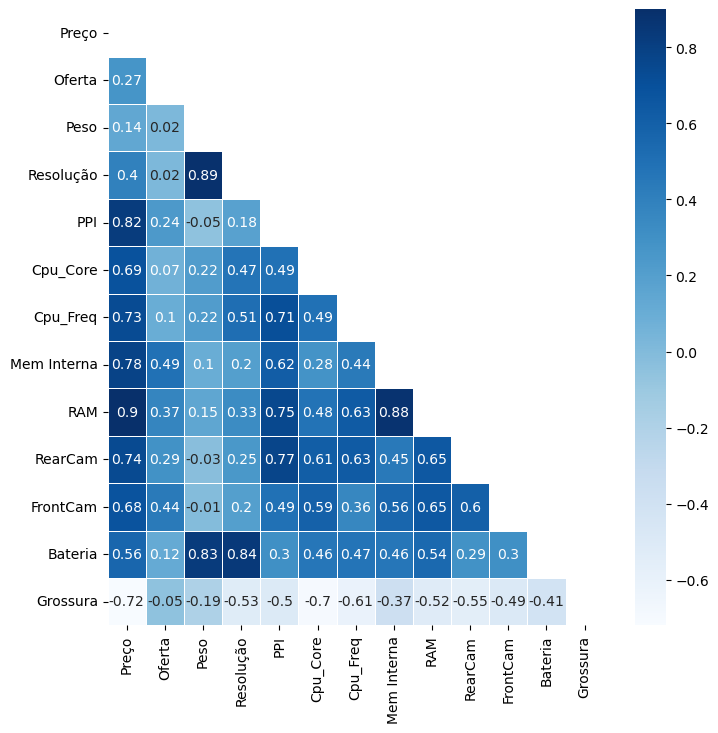

In [11]:
# Mapa de calor da correlação
# ==============================================================================
plt.figure(figsize=(8,8))
corr = round(data.drop(["ID Producto"], axis =1 ).corr(),2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, annot=True, cmap = "Blues")
plt.show()

**Conclusões da visualização dos dados**

*  *A coluna **Preço** possue alta correlação positiva com as colunas **PPI**, **CpuFreq**, **Mem Interna**, **RAM**, **RearCam**, **FrontCam**.*
*  *A coluna **Preço** possue a baixa correlação positiva com as colunas **Resolução**, **Cpu_Core**, **FrontCam**, **Bateria**.*
* *A coluna **Preço** possue uma alta correlação com a coluna Grossura.*
* *Pelo comentado anteriormente, as variáveis selecionadas para a construção do modelo serão :*
    $\textbf{Resolução, PPI, Cpu_Core, Cpu_Freq, Mem Interna, RAM, RearCam, FrontCam, Bateria, Grossura}$
* *As variáveis removidas serão as colunas $\textbf{Oferta}$ e $\textbf{Peso}$, por ter uma correlação muito baixa $0.27$ e $0.14$, respectivamente.*

# 4. Feature engineering

## 4.1 Separando os dados 

*O objetivo deste projeto é estimar o Preço dos smartphone, assim que precisamos separar a data em :*
*  *Variáveis de entrada: **Resolução, PPI, Cpu_Core, Cpu_Freq, Mem Interna, RAM, RearCam, FrontCam, Bateria, Grossura**.*
*  *E variável de saída: Price*

In [12]:
# Separando os dados em dados de entrada e saída
# ==============================================================================
X = data.drop(["ID Producto", "Oferta","Peso","Preço"], axis =1)
y = data.Preço

## 4.2 Padronizando os dados

*Ao construir um modelo de Machine learning usualmente encontramos algumas dificultades que podem trazer problemas ao modelo e, como consequência, reduzir o seu valor preditivo. Um tipo de problema, podemos citar, conjuntos de dados cujas características variam em magnitude e/ou unidades.*

*Neste modelo, as variáveis **Cpu freq** e **Bateria** diferem drasticamente em magnitude. Assim, ao aplicar técnicas de Machine learning a essas variáveis, o algoritmo considerará a variável Bateria mais dominante que Cpu freq, devido à sua imensa diferença númerica.*

*Uma forma de evitar esse conflito é padronizar essas variáveis, ou seja, fazer $\mu = 0$  e  $\sigma =1$. Para uniformizar as variáveis, precisamos importar a biblioteca StandardScaler. Após padronizar as variáveis, cada variável contribuira igualmente para o análise.*

In [13]:
# Importando a biblioteca StandardScaler
# ==============================================================================
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

# 5. Modelo de Machine Learning 

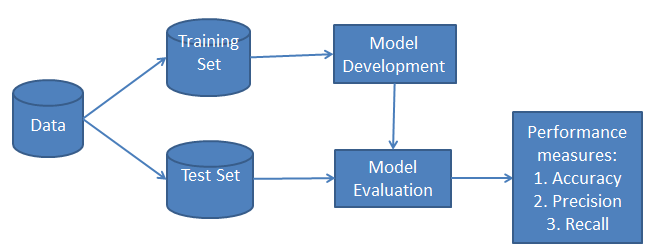

                      Source : Internet.  

##  5.1  Separando os dados

*Tal como acontece com todos os estudos preditivos, não é importante apenas ajustar o modelo, mas também quantificar sua capacidade de prever novas observações.*

*Para realizar esta avaliação, dividimos os dados em dois grupos, um deles em dados de treinamento e outro em dados de teste,essa abordagem é conhecida como método hold-out.*

In [14]:
# O código a seguir executa esta tarefa, decompõe os dados em dados de treinamento e teste.
'''Obs: 
   If we use any integer value for random_state, then it will produce the same result for an integer 
   value. 
   If we change the value of random_state, then only the result will be different.
   If we write none, it will produce different results in every execution. '''
# ==============================================================================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.2 Regressão linear

*Em resume, regressão linear é um método estatístico que nos permite encontrar a relação que existe entre uma variável dependente(output) e uma ou mais variáveis independentes (inputs). Maior detalhes pode encontrá-se [3].*

### Criação do modelo


In [15]:
# Biblioteca de Regressão linear
# ==============================================================================
from sklearn.linear_model import LinearRegression

In [16]:
# Criação do modelo
# ==============================================================================
modelo = LinearRegression()


In [17]:
# Treinando o modelo
# ==============================================================================
modelo.fit(X_train , y_train)

LinearRegression()

### Informação do modelo

In [18]:
# Conhecendo a intercepção e coeficientes do modelo
# ==============================================================================
col =data.drop(["ID Producto", "Oferta","Peso", "Preço"], axis =1).columns
print("Intercepção:", modelo.intercept_)
print("Coeficiente:", list(zip(col, modelo.coef_.flatten(), )))
print("Coeficiente de determinação R^2:", modelo.score(X, y))

Intercepção: 2213.650601730732
Coeficiente: [('Resolução', -149.46961766922453), ('PPI', 150.6614361025387), ('Cpu_Core', 127.0856160965189), ('Cpu_Freq', 89.94846070889832), ('Mem Interna', 138.94537659761534), ('RAM', 175.72077686871904), ('RearCam', 18.91884502796941), ('FrontCam', 19.62820968498704), ('Bateria', 162.20848744245217), ('Grossura', -173.1464636183603)]
Coeficiente de determinação R^2: 0.9520460023025747


### Previsões

In [19]:
# Uma vez treinando o modelo, evaluamos a capacidade preditiva do modelo utilizando os dados teste. 
# ==============================================================================
predictions = modelo.predict(X_test)
print(predictions)

[ 889.83079506 1864.60838744 2645.96007853 1519.54475511 1621.36149814
 1862.39815299  889.83079506 1323.86700994 2377.57043131 2645.96007853
 1394.18451921 1615.20343134 1737.99698487 2832.47775511 2232.8592747
 2211.63770675 2569.58864593 3049.15871321 1443.20839181 2211.63770675
 2323.03487647 1737.99698487 1907.41268717 2440.94343292 3119.41861839
 4150.53593699 2415.23166969 3430.78197252 2668.39488513 2503.66509093
 3041.19253164 2584.6438116  2542.60926854]


### Error

In [20]:
# Importando a biblioteca mean_squared_error
# ==============================================================================
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions,
        squared = False
       )
print("")
print(f"O error (rmse) do dados teste é : {rmse}")


O error (rmse) do dados teste é : 152.2012804562195


## 5.3 Diagnostico do modelo 

*Realizar o diagnóstico em um modelo de regressão linear é importante para garantir que os pressupostos do modelo estão sendo atendidos, que o modelo é apropriado aos dados e que as estimativas dos parâmetros são confiáveis. Isso ajuda a tomar decisões informadas com base nos resultados do modelo.*

### Valor atual - Previsão

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  if __name__ == "__main__":


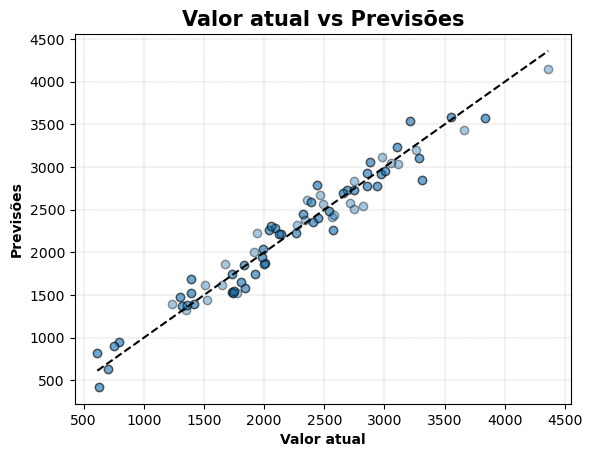

In [21]:
# Previsões
# ==============================================================================
prediccion_train = modelo.predict(X_train)
residuos_train   = prediccion_train - y_train
plt.scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)

plt.title('Valor atual vs Previsões', fontsize = 15, fontweight = "bold")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black')
plt.ylabel("Previsões" , weight = "bold")
plt.xlabel("Valor atual", weight = "bold")
plt.grid(color='black', linestyle='--', linewidth=0.1)
plt.show()

## Residuos do modelo

*Verificar a homoscedasticidade dos resíduos: A homoscedasticidade dos resíduos significa que a variância dos resíduos é constante em todo o intervalo das variáveis independentes.*

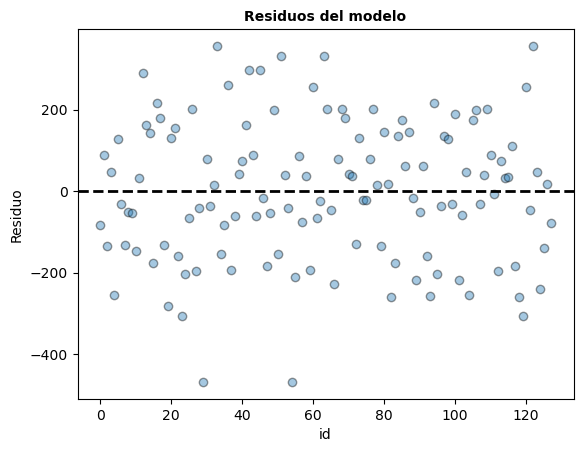

In [22]:
# The residues must be distributed in homogeneous way along the x-axis,  
# but they must present the same variability along the x-axis (homocedasticity)
plt.scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
plt.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
plt.title('Residuos del modelo', fontsize = 10, fontweight = "bold")
plt.xlabel('id')
plt.ylabel('Residuo')
plt.show()

### Distribução dos residuos
Avaliar a normalidade dos resíduos: A normalidade dos resíduos é um pressuposto importante do modelo de regressão linear. Se os resíduos não seguem uma distribuição normal, pode haver problemas na interpretação dos coeficientes e na validade dos testes estatísticos realizados no modelo.

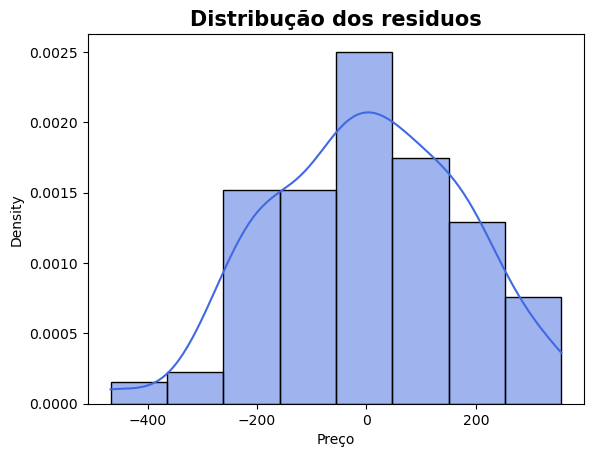

In [23]:
# To verify the above computation is valid,  we need to check that our residues must
# independent and present a normal distribution with mean = 0 and variance σ^2.
# ==============================================================================
sns.histplot(residuos_train, stat = "density", kde = True, color = "royalblue")
plt.title('Distribução dos residuos', fontsize = 15,
                     fontweight = "bold")
plt.xlabel("Preço")
plt.show()

# 6. Resultados e Conclusões


* O modelo de regressão linear possue a seguinte forma :

\begin{equation}
\fbox{$\mathbf{Preço = 2213.650 -149.469\times Resolução + 150.661\times PPI+127.085\times CpuCore \\+ 89.948\times CpuFreq+138.945 \times Mem Interna + 175.720\times RAM+18.918\times RearCam \\+ 19.628\times FrontCam + 162.208\times Bateria -173.146\times Grossura}$}
\end{equation}

* O error (rmse) dos dados teste é $152.20$, ou seja, nossas previsões se afastam $152.20$ unidades do valor real.

* O coeficiente de determinação é de  $R^2=0.99$, isso quer dizer,o modelo é capaz de explicar $99\%$ da variabilidade observada.

# 7. Referências

   [1] https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction/
   
   [2] https://scikit-learn.org/0.21/_downloads/scikit-learn-docs.pdf
   
   [3] https://medium.com/@johanrenzosm/meu-primeiro-post-construindo-um-modelo-de-regress%C3%A3o-linear-simples-e75d71114606
   
   [4] https://www.kaggle.com/code/johanrenzosm/medium-modelo-simples-de-regress-o-linear
   
   [5] Regresión lineal con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

**Obrigado por olhar meu notebook. Agradeço imensamente dicas, sugestões e votos** :D